In [1]:
import pandas as pd

df1=pd.read_csv('./data/서울특별시_부동산_실거래가_정보_2020년.csv', encoding='cp949')

df1[df1['자치구명']=='성북구'].head()   # pandas 모듈에서 읽은 데이터를 상위 5개만 출력

C:\Users\wooky\.conda\envs\multi\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11290-2020-4-0000066-1,1129013800101440024,11290,성북구,1129013800,장위동,2020,4,신고,1,0.0,59.92,2,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,11290-2020-4-0000628-1,1129013400105080016,11290,성북구,1129013400,길음동,2020,4,신고,1,0.0,84.77,2,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
71,11290-2020-4-0003911-1,1129013800101730114,11290,성북구,1129013800,장위동,2020,4,신고,1,0.0,116.91,B,2.0,2001,아파트,1270000000,0.0,래미안장위퍼스트하이
275,11290-2020-4-0000749-1,1129013900100100000,11290,성북구,1129013900,석관동,2020,4,신고,1,NaN,84.90,0,17.0,2001,아파트,647000000,1998.0,두산
5825,11290-2020-4-0002784-1,1129013900,11290,성북구,1129013900,석관동,2020,4,신고,1,89.0,59.97,0,NaN,1001,단독주택,270000000,1973.0,NaN


In [2]:
type(df1['자치구명'])

pandas.core.series.Series

In [3]:
type(df1[['자치구명', '건물주용도']])

pandas.core.frame.DataFrame

In [4]:
df1.columns

Index(['실거래가아이디', '지번코드', '시군구코드', '자치구명', '법정동코드', '법정동명', '신고년도', '업무구분코드',
       '업무구분', '물건번호', '대지권면적', '건물면적', '관리구분코드', '층정보', '건물주용도코드', '건물주용도',
       '물건금액', '건축년도', '건물명'],
      dtype='object')

## 데이터프레임에서 결측지(NaN)값 처리하기
- 결측지(NaN): 표현이 불가능한 데이터(빈 값)
- DataFrame.isnull()

In [6]:
# 데이터프래임 구조에서 원하는 필드값만 가져와 재정의하기
df1=df1[['자치구명', '법정동명', '건물주용도', '건축년도', '건물면적', '층정보', '물건금액', '건물명']]

# 데이터프레임의 데이터 정보 확인하기
df1.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   자치구명    176001 non-null  object 
 1   법정동명    176001 non-null  object 
 2   건물주용도   176001 non-null  object 
 3   건축년도    175436 non-null  float64
 4   건물면적    176001 non-null  float64
 5   층정보     163838 non-null  float64
 6   물건금액    176001 non-null  int64  
 7   건물명     163838 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 10.7+ MB


In [10]:
# 열 단위 NaN 값의 갯수 확인하기

df1.isnull().sum()

자치구명         0
법정동명         0
건물주용도        0
건축년도       565
건물면적         0
층정보      12163
물건금액         0
건물명      12163
dtype: int64

In [11]:
df1[df1['층정보'].isnull()].head(3)

,자치구명,법정동명,건물주용도,건축년도,건물면적,층정보,물건금액,건물명
9,용산구,후암동,단독주택,2014.0,87.91,NaN,740000000,NaN
19,성동구,옥수동,단독주택,1986.0,174.51,NaN,1730000000,NaN
25,중구,남대문로5가,단독주택,1970.0,145.46,NaN,1850000000,NaN


In [12]:
df1[df1['층정보'].isnull()].tail(3)

,자치구명,법정동명,건물주용도,건축년도,건물면적,층정보,물건금액,건물명
175997,마포구,연남동,단독주택,1973.0,147.34,NaN,2430000000,NaN
175999,마포구,신수동,단독주택,1967.0,46.41,NaN,899900000,NaN
176000,마포구,신정동,단독주택,1970.0,25.69,NaN,1358000000,NaN


In [14]:
# 전체 NaN 값을 1로 변경
df1.fillna(1)    

,자치구명,법정동명,건물주용도,건축년도,건물면적,층정보,물건금액,건물명
0,성북구,장위동,아파트,0.0,59.92,5.0,749000000,래미안 장위포레카운티
1,성북구,길음동,아파트,0.0,84.77,18.0,1200000000,롯데캐슬 클라시아
2,구로구,구로동,아파트,1994.0,36.90,1.0,105000000,궁전아트빌라
3,용산구,산천동,아파트,2001.0,59.55,2.0,830000000,리버힐삼성
4,용산구,이촌동,아파트,1971.0,64.43,5.0,735000000,강변
...,...,...,...,...,...,...,...,...
175996,마포구,상암동,단독주택,1998.0,294.03,1.0,1450000000,1
175997,마포구,연남동,단독주택,1973.0,147.34,1.0,2430000000,1
175998,마포구,망원동,연립주택,1983.0,46.77,3.0,405000000,(459-4)
175999,마포구,신수동,단독주택,1967.0,46.41,1.0,899900000,1


In [15]:
# 특정 열의 NaN 값을 찾아 원하는 값으로 변경 후 저장
df1=df1.fillna({'층정보':1, '건물명':'단독', '건축년도':0})
df1.isnull().sum()

자치구명     0
법정동명     0
건물주용도    0
건축년도     0
건물면적     0
층정보      0
물건금액     0
건물명      0
dtype: int64

In [16]:
# NaN 데이터 삭제: dropna() 함수 사용, 
# 옵션: how="any" => 기본옵션, NaN이 하나라도 존재하면 삭제
# 옵션: how="all" => 데이터 전체(행 전체)가 NaN인 데이터만 삭제

df1.dropna(how="all")

,자치구명,법정동명,건물주용도,건축년도,건물면적,층정보,물건금액,건물명
0,성북구,장위동,아파트,0.0,59.92,5.0,749000000,래미안 장위포레카운티
1,성북구,길음동,아파트,0.0,84.77,18.0,1200000000,롯데캐슬 클라시아
2,구로구,구로동,아파트,1994.0,36.90,1.0,105000000,궁전아트빌라
3,용산구,산천동,아파트,2001.0,59.55,2.0,830000000,리버힐삼성
4,용산구,이촌동,아파트,1971.0,64.43,5.0,735000000,강변
...,...,...,...,...,...,...,...,...
175996,마포구,상암동,단독주택,1998.0,294.03,1.0,1450000000,단독
175997,마포구,연남동,단독주택,1973.0,147.34,1.0,2430000000,단독
175998,마포구,망원동,연립주택,1983.0,46.77,3.0,405000000,(459-4)
175999,마포구,신수동,단독주택,1967.0,46.41,1.0,899900000,단독


## pandas.DataFrame 데이터 관리
### 데이터 검색
- 단일조건: df[ df['열이름']==조건 ]
- 다중조건: df[ (df['열이름']==조건1) & (df['열이름']==조건2) ] => AND 연산
- 다중조건: df[ (df['열이름']==조건1) | (df['열이름']==조건2) ] => or 연산

In [17]:
# 자치구명이 성북구인 데이터에서 법정동명을 가져와 고유값(중복제거) 출력
df1[df1['자치구명']=='성북구']['법정동명'].unique()

array(['장위동', '길음동', '석관동', '성북동', '돈암동', '정릉동', '상월곡동', '동선동5가', '동선동3가',
       '종암동', '삼선동1가', '하월곡동', '동소문동5가', '보문동6가', '삼선동3가', '안암동3가',
       '삼선동2가', '동선동1가', '삼선동4가', '안암동1가', '보문동3가', '삼선동5가', '동선동4가',
       '동소문동7가', '보문동1가', '동소문동4가', '보문동5가', '동소문동6가', '안암동4가', '성북동1가',
       '안암동5가', '보문동4가', '안암동2가', '보문동2가', '보문동7가', '동소문동1가', '동소문동2가',
       '동선동2가'], dtype=object)

In [18]:
# 자치구명이 성북구인 데이터에서 법정동명을 가져와 동별 개수를 체크해 출력
df1[df1['자치구명']=='성북구']['법정동명'].value_counts()

정릉동       1807
장위동       1280
길음동        987
돈암동        847
석관동        767
하월곡동       753
종암동        598
성북동        369
보문동6가      166
상월곡동       154
삼선동2가      110
동소문동4가     107
삼선동4가       73
삼선동3가       63
동소문동7가      61
동선동4가       56
안암동3가       54
삼선동1가       47
보문동3가       45
안암동1가       43
삼선동5가       40
성북동1가       29
동선동5가       26
안암동2가       23
보문동5가       20
동소문동5가      19
보문동1가       18
동소문동6가      17
동선동1가       16
보문동4가       14
동선동3가       13
보문동7가       10
안암동4가       10
보문동2가        9
안암동5가        6
동소문동1가       4
동소문동2가       2
동선동2가        1
Name: 법정동명, dtype: int64

In [19]:
# 자치구가 성북구이면서 건물주용도가 아파트인 데이터에 대한 법정동명 거래 건수 출력
df2=df1[ (df1['자치구명']=='성북구') & (df1['건물주용도']=='아파트')]['법정동명'].value_counts()
print(df2)

정릉동       1072
길음동        871
돈암동        786
하월곡동       506
종암동        376
석관동        253
장위동        168
보문동6가      148
상월곡동       115
삼선동2가       94
동소문동7가      49
보문동3가       43
동소문동4가      42
안암동1가       33
삼선동3가       27
안암동3가       27
삼선동4가       23
동소문동5가      16
성북동         10
보문동4가       10
동선동1가        6
동소문동6가       5
안암동4가        5
보문동1가        4
성북동1가        2
동선동4가        2
보문동2가        2
동선동3가        1
Name: 법정동명, dtype: int64


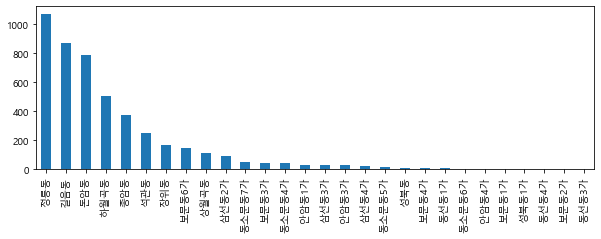

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)


df2.plot(kind='bar', figsize=(10, 3))
plt.show()

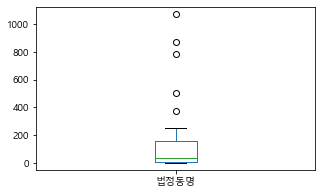

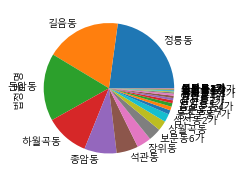

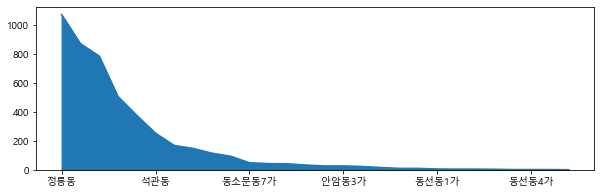

In [21]:
# kind="" : bar, pie, hist, kde, box, scatter, area

df2.plot(kind='box', figsize=(5, 3))
plt.show()

df2.plot(kind='pie', figsize=(5, 3))
plt.show()

df2.plot(kind='area', figsize=(10, 3))
plt.show()

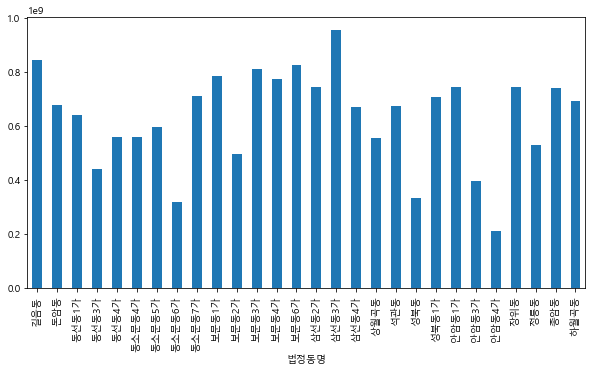

In [22]:
df2=df1[(df1['자치구명']=='성북구')&(df1['건물주용도']=='아파트')].groupby('법정동명').mean()
#print(df2)
df2['물건금액'].plot(kind='bar', figsize=(10, 5))
plt.show()

## [미션] 구단위/동별 물건금액의 평균값 시각화
- 구이름, 건물주용도는 사용자에게 입력받아 진행
- 출력 평균은 동을 기준로 계산 및 출력

C:\Users\wooky\.conda\envs\multi\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


구 이름:성북구
건물용도:단독주택


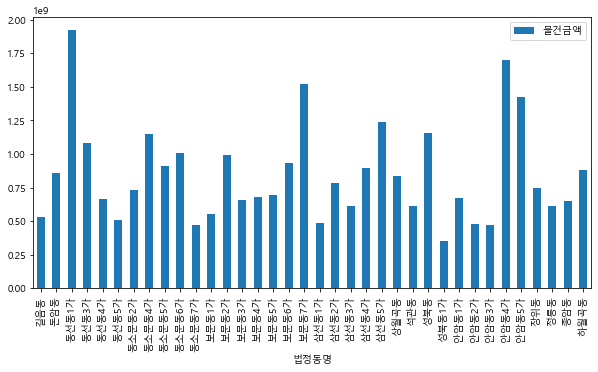

In [23]:
import pandas as pd

df1=pd.read_csv('./data/서울특별시_부동산_실거래가_정보_2020년.csv', encoding='cp949')

df1=df1[['자치구명', '법정동명', '건물주용도', '건축년도', '건물면적', '층정보', '물건금액', '건물명']]

# 특정 열의 NaN 값을 찾아 원하는 값으로 변경 후 저장
df1=df1.fillna({'층정보':1, '건물명':'단독', '건축년도':0})
#print(df1.isnull().sum())

gu=input('구 이름:')
ju=input('건물용도:')

df2=df1[(df1['자치구명']==gu)&(df1['건물주용도']==ju)][['법정동명','물건금액']].groupby('법정동명').mean()
#print(df2)
df2.plot(kind="bar", figsize=(10, 5))
plt.savefig('./data/'+gu+"_"+ju+"_평균거래정보.png")
plt.show()

In [24]:
gu=input('구 이름:')
ju=input('건물용도:')

df1[(df1['자치구명'].str.contains(gu)) & (df1['건물주용도'].str.contains(ju))]

구 이름:성
건물용도:파


,자치구명,법정동명,건물주용도,건축년도,건물면적,층정보,물건금액,건물명
0,성북구,장위동,아파트,0.0,59.92,5.0,749000000,래미안 장위포레카운티
1,성북구,길음동,아파트,0.0,84.77,18.0,1200000000,롯데캐슬 클라시아
10,성동구,옥수동,아파트,1998.0,114.78,16.0,2030000000,옥수하이츠
14,성동구,행당동,아파트,2000.0,59.96,12.0,745000000,대림e-편한세상
16,성동구,성수동1가,아파트,1997.0,60.00,7.0,695000000,우방
...,...,...,...,...,...,...,...,...
164841,성동구,하왕십리동,아파트,2004.0,84.42,4.0,805000000,왕십리풍림아이원
164842,성동구,성수동1가,아파트,1992.0,84.22,5.0,845000000,뚝섬현대
164843,성동구,사근동,아파트,1989.0,71.85,6.0,480000000,중앙하이츠
169040,성북구,길음동,아파트,1998.0,111.71,1.0,710000000,돈암2-1삼부
